### **`Data Preprocessing`**

In [17]:
import pandas as pd
import re

# read the dataset file
df = pd.read_csv('./ckd-dataset-v2.csv')

# check the top 5 rows of dataframe
df.head()

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,...,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,class,meta
2,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
3,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
4,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12


In [18]:
# as we can see row 0 and 1 contain garbadge values so we can delete these two rows
df.drop([0,1],axis=0,inplace=True)

# reset the index after droping row 1 and 2
df = df.reset_index(drop=True)

# again check the top 5 extries 
df.head()

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
1,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
2,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12
3,1,1,1.009 - 1.011,3 - 3,ckd,0,< 0,0,0,0,...,0,0,0,0,0,0,127.281 - 152.446,s1,1,< 12
4,0,0,1.015 - 1.017,< 0,ckd,0,< 0,0,0,0,...,0,1,0,1,1,0,127.281 - 152.446,s1,1,12 - 20


In [19]:
# check if there is any null/NaN entry present in our dataframe
df.isnull().values.any()

False

As we can see we don't have any `row/column` having `Null/NaN` value in it

In [20]:
# seperate features and target variables 
X = df.drop(['class'], axis=1)
Y = df['class']

From now `X` and `Y` is our `Feature` and `Target` columns respectively

In [21]:
# check for unique classes in target column
Y.unique()

array(['ckd', 'notckd'], dtype=object)

In [22]:
# convert the categories of target ("ckd", "notckd") to (1, 0) 
Y = Y.map({'ckd': 1, 'notckd': 0})

<AxesSubplot: >

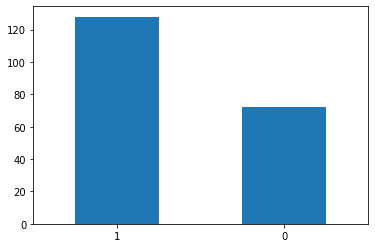

In [23]:
# Check for class imballance problem
Y.value_counts().plot.bar(rot=0)

we are having **`70-75` notckd** and almost **`125 ckd`** data points. <br />
So, we could say that we don't have serious `class-imballance` problem in dataset. <br />
Now our focus is on `Feature valiables`

In [24]:
X.head()

,bp (Diastolic),bp limit,sg,al,rbc,su,pc,pcc,ba,bgr,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,0,0,1.019 - 1.021,1 - 1,0,< 0,0,0,0,< 112,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
1,0,0,1.009 - 1.011,< 0,0,< 0,0,0,0,112 - 154,...,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
2,0,0,1.009 - 1.011,≥ 4,1,< 0,1,0,1,< 112,...,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12
3,1,1,1.009 - 1.011,3 - 3,0,< 0,0,0,0,112 - 154,...,0,0,0,0,0,0,127.281 - 152.446,s1,1,< 12
4,0,0,1.015 - 1.017,< 0,0,< 0,0,0,0,154 - 196,...,0,1,0,1,1,0,127.281 - 152.446,s1,1,12 - 20


In [25]:
X['stage'].unique()

array(['s1', 's4', 's3', 's2', 's5'], dtype=object)

Convert the categories of **`stage`** column (s1, s2,...) in to number (1, 2,...)

In [26]:
X['stage'] = X['stage'].map({'s1': 1, 's2': 2, 's3': 3, 's4': 4, 's5': 5})

Removing '<','>' and '-' while keeping the suitable values

In [27]:
#Applied function to all columns
#Addded 1 after removing '>', Subtracted 1 after removing '<' and kept the first value when values are given in range like "3-6" and the original value when there was '≥' 
#Removed all unnecessary whitespaces 

#loop for finding average 
def find_avg(col):
    for idx in X.index:
        q = X._get_value(idx,col)
        if '-' in str(q):
                b = re.search(r'([0-9]*[.]?[0-9]+)\-([0-9]*[.]?[0-9]+)',str(q))
                if b:
                    int1=b.group(1)
                    int2=b.group(2)             
                    int1=round(float(int1))
                    int2=round(float(int2))
                    avg = list(range(int(int1), int(int2)))
                    try:
                        avg = sum(avg)/len(avg)  
                    except ZeroDivisionError:
                        avg = 0
                    X._set_value(idx,col,avg)
                else:
                    pass



            

X = X.applymap(lambda x: str(x).replace(' ','') if ' ' in str(x) else x)

X = X.applymap(lambda x: float(x[1:])-1 if '<' in str(x) else (str(x).replace(r'≥','') if '≥' in str(x) else(float(x[1:])+1 if '>' in str(x) else x )))

#applying average function individually on every column
find_avg('sg')
find_avg('al')
find_avg('su')
find_avg('bgr')
find_avg('bu')
find_avg('sod')
find_avg('sc')
find_avg('pot')
find_avg('hemo')
find_avg('pcv')
find_avg('rbcc')
find_avg('wbcc')
find_avg('grf')
find_avg('age')


X.head()

,bp (Diastolic),bp limit,sg,al,rbc,su,pc,pcc,ba,bgr,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,0,0,0,0,0,-1.0,0,0,0,111.0,...,0,0,0,0,0,0,227.944,1,1,11.0
1,0,0,0,-1.0,0,-1.0,0,0,0,132.5,...,0,0,0,0,0,0,227.944,1,1,11.0
2,0,0,0,4,1,-1.0,1,0,1,111.0,...,0,0,0,1,0,0,139.0,1,1,11.0
3,1,1,0,0,0,-1.0,0,0,0,132.5,...,0,0,0,0,0,0,139.0,1,1,11.0
4,0,0,0,-1.0,0,-1.0,0,0,0,174.5,...,0,1,0,1,1,0,139.0,1,1,15.5
